In [2]:
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import path
from utils import createInputFigure

from sklearn import preprocessing
import os
import time
import copy

In [3]:
%load_ext autoreload
%autoreload 2

In [17]:
picType = 'gasf'
dataType = 'cca128'
dataPath = path('Models\\'+picType)
modelsTitles = os.listdir(dataPath())[1:]
table = pd.DataFrame(index = range(len(modelsTitles)), columns = ['model', 'best val acc', 'best val loss', 'training acc', 'training loss'])

for model, k in zip(modelsTitles, list(range(len(modelsTitles)))):
                    
    Path = path(dataPath/model+'/'+dataType)
    Training, Validation = torch.load(Path/'stats512.pth')['512']
    
    for i in range(len(Training[0])):
        Training[0][i] = Training[0][i].item()
        Validation[0][i] = Validation[0][i].item()
        
    bestValAccArg = np.argmax(Validation[0])
    
    table.loc[k] = [model, Validation[0][bestValAccArg], Validation[1][bestValAccArg],
                           Training[0][bestValAccArg], Training[1][bestValAccArg]]
                    
table = table.sort_values(by = 'best val acc', ascending = False, ignore_index = True)
table

,model,best val acc,best val loss,training acc,training loss
0,densenet161,0.827839,0.633519,0.993132,0.0366975
1,resnet152,0.826007,0.690557,0.995879,0.0258854
2,resnet34,0.820513,0.715833,0.992674,0.0308838
3,densenet121,0.804029,0.717805,0.986264,0.0579804
4,resnet18,0.800366,0.810565,0.994963,0.031701
5,googlenet,0.791209,0.826886,0.989927,0.0526342
6,resnet101,0.791209,0.744109,0.992674,0.0240675
7,resnet50,0.771062,0.811559,0.962454,0.120791
8,vgg11,0.705128,0.97788,0.919414,0.293853
9,vgg13,0.694139,0.998538,0.93544,0.254939


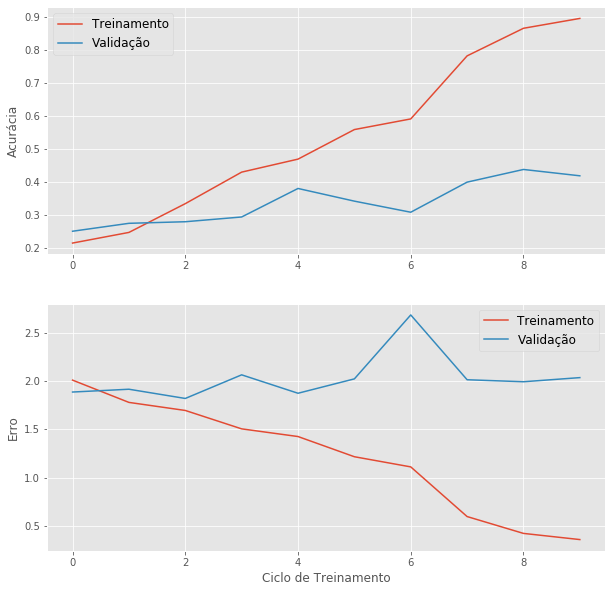

In [24]:
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows = 2, ncols = 1)

fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace = 0.2)
size = len(Training[0])

axs[0].plot(range(size), Training[0], label = 'Treinamento'); axs[1].plot(range(size), Training[1], label = 'Treinamento')
axs[0].plot(range(size), Validation[0], label = 'Validação'); axs[1].plot(range(size), Validation[1], label = 'Validação')

axs[1].set(xlabel = 'Ciclo de Treinamento')
axs[0].set(ylabel = 'Acurácia')
axs[1].set(ylabel = 'Erro')
axs[0].legend(fontsize = 12)
axs[1].legend(fontsize = 12)

fig.savefig('figure.png')

512
64
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7362637362637363
96
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7435897435897436
128
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7637362637362637
160
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.782051282051282
192
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7912087912087912
224
Max Train Accuracy: 0.9981684981684982 - Max Val Accuracy: 0.7747252747252747
256
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7637362637362637
288
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7710622710622711


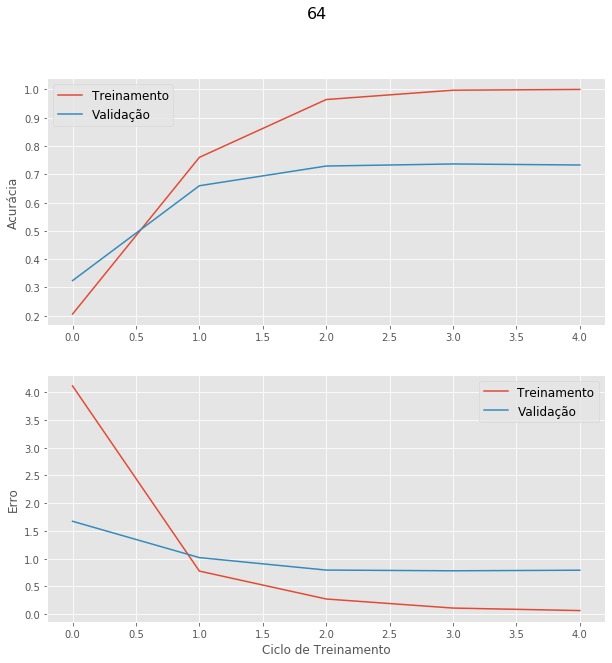

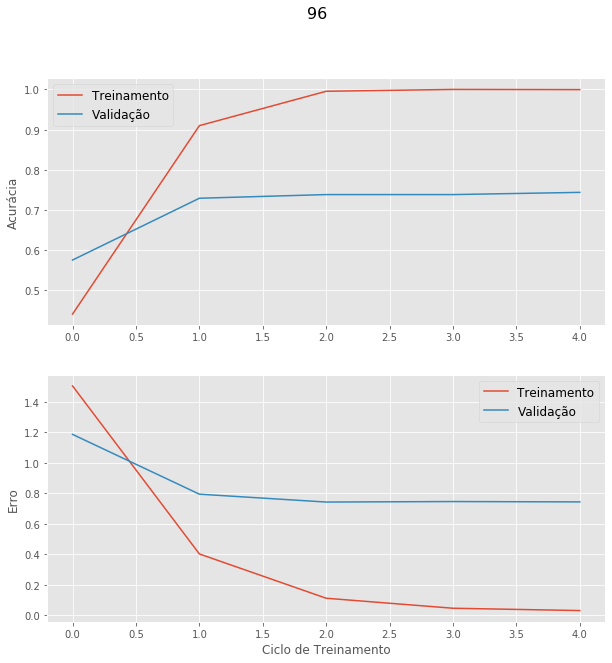

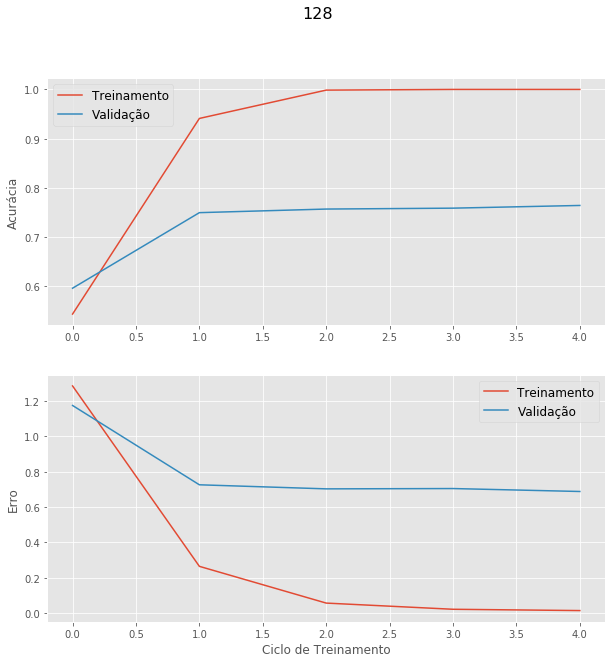

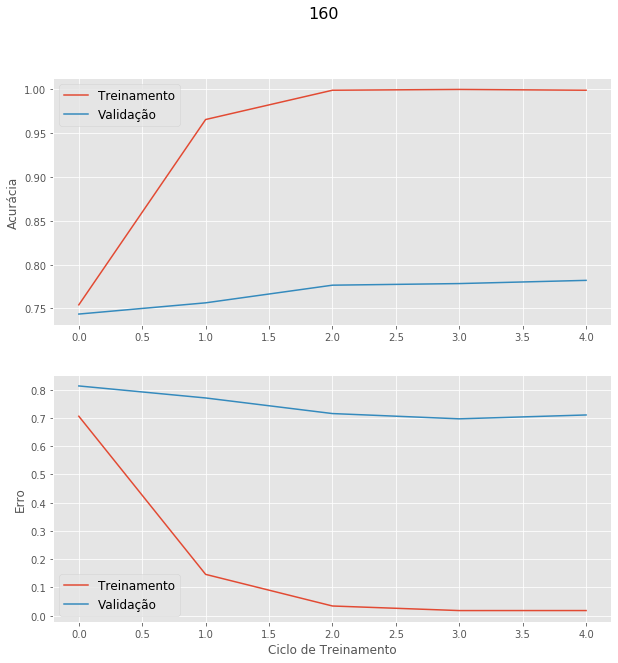

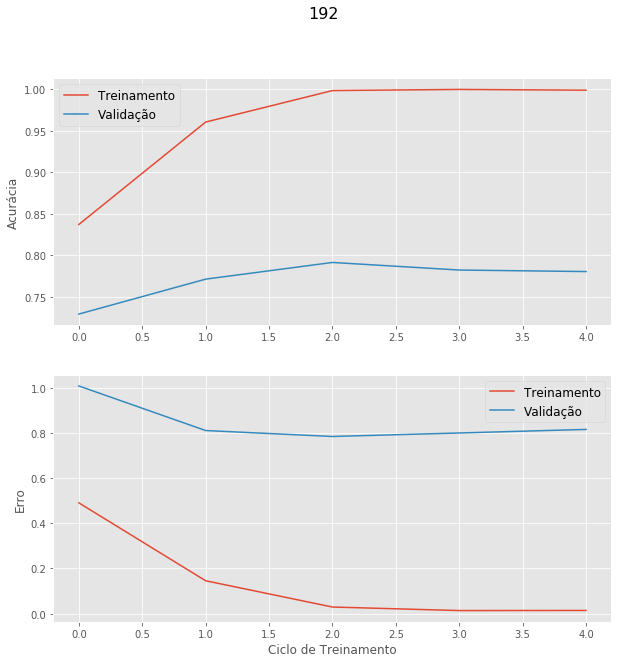

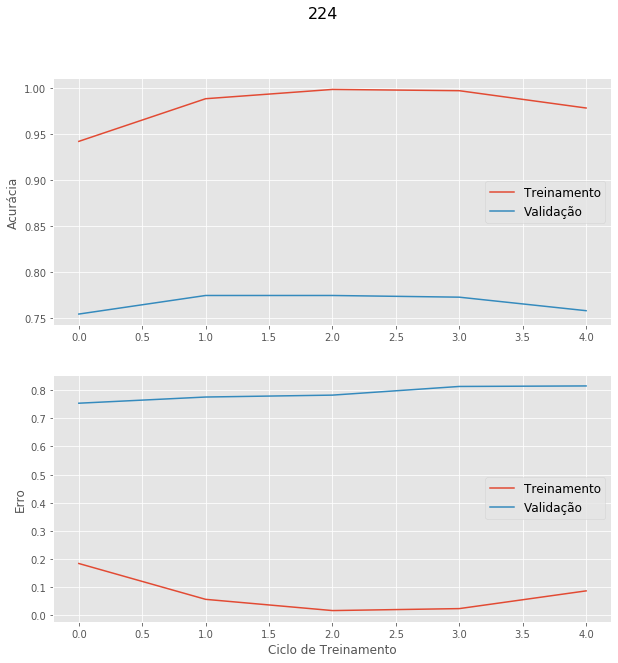

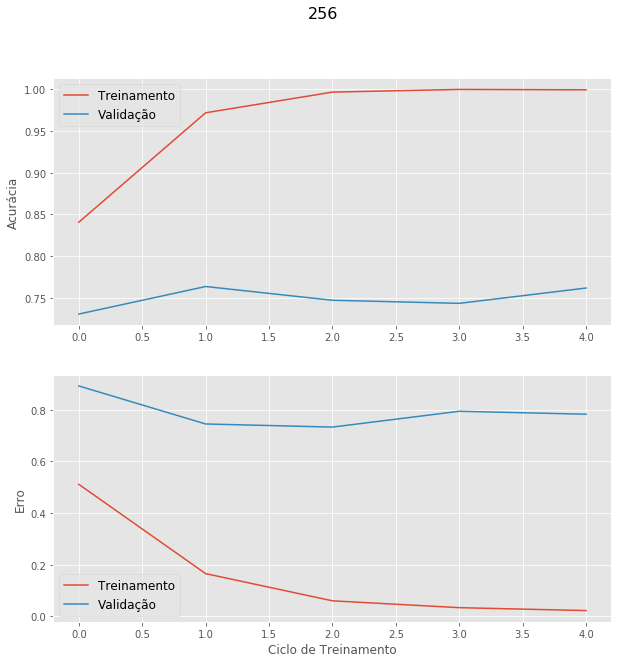

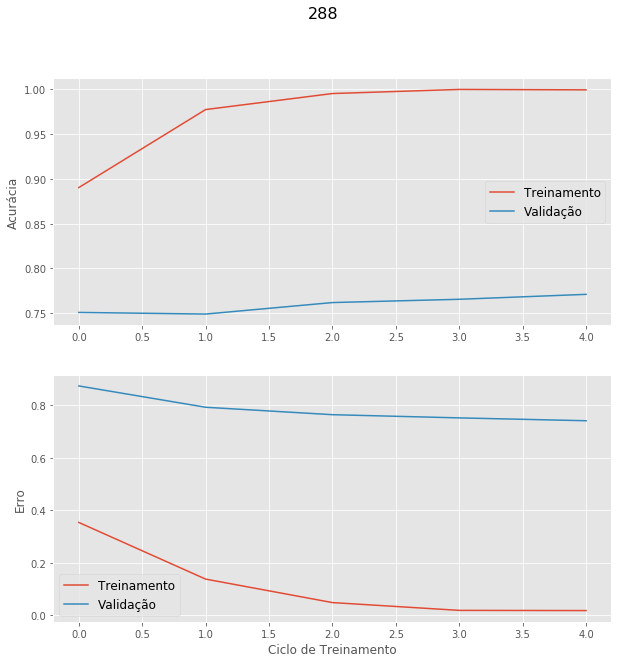

In [7]:
plt.style.use('ggplot')
folder = 'cca'
dataType = '512'
size = ['64' ,'96', '128', '160', '192', '224', '256', '288']

print(dataType)
for k in size:
    path = 'Models\\resnet34\\'+folder+k+'\\stats'+dataType+".pth"
    stats = torch.load(path)[dataType]
    trainAcc = stats[0][0]
    valAcc = stats[1][0]
    trainLoss = stats[0][1]
    valLoss = stats[1][1]
    
    for i in range(len(trainAcc)):
        trainAcc[i]  = trainAcc[i].item() 
        valAcc[i] = valAcc[i].item()
    
    print(k)
    print("Max Train Accuracy: {} - Max Val Accuracy: {}".format(max(trainAcc), max(valAcc)))
    
    fig, axs = plt.subplots(nrows = 2, ncols = 1)      
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(hspace = 0.2)
    size = len(trainAcc)
    
    axs[0].plot(range(size), trainAcc, label = 'Treinamento')
    axs[1].plot(range(size), trainLoss, label = 'Treinamento')
    axs[0].plot(range(size), valAcc, label = 'Validação')
    axs[1].plot(range(size), valLoss, label = 'Validação')
        
    axs[1].set(xlabel = 'Ciclo de Treinamento')
    axs[0].set(ylabel = 'Acurácia')
    axs[1].set(ylabel = 'Erro')
    axs[0].legend(fontsize = 12)
    axs[1].legend(fontsize = 12)
    
    fig.suptitle(k, fontsize = 16)
    
    fig.savefig('figure'+folder+k+'.png')